## 1. IMPORTAR LIBRERÍAS
### Importamos las librerías necesarias para la manipulación de datos y visualización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. CARGAR LOS DATOS
### Cargamos el dataset proporcionado por el usuario.

In [2]:
file_path = 'FastFoodNutritionMenuV2.csv'
data = pd.read_csv(file_path)


## 3. DATAFRAME HEAD
### Mostramos las primeras 5 filas del dataset para visualizar su estructura inicial.

In [3]:
print("Primeras 5 filas del dataset:")
print(data.head())

Primeras 5 filas del dataset:
      Company                           Item Calories Calories from\nFat  \
0  McDonald’s                      Hamburger      250                 80   
1  McDonald’s                   Cheeseburger      300                110   
2  McDonald’s            Double Cheeseburger      440                210   
3  McDonald’s                       McDouble      390                170   
4  McDonald’s   Quarter Pounder® with Cheese      510                230   

  Total Fat\n(g) Saturated Fat\n(g) Trans Fat\n(g) Cholesterol\n(mg)  \
0              9                3.5            0.5                25   
1             12                  6            0.5                40   
2             23                 11            1.5                80   
3             19                  8              1                65   
4             26                 12            1.5                90   

  Sodium \n(mg) Carbs\n(g) Fiber\n(g) Sugars\n(g) Protein\n(g)  \
0           52

## 4. DATAFRAME INFO
### Información general del dataset, incluyendo el número de filas, columnas y tipos de datos.

In [4]:
print("\nInformación general del dataset:")
print(data.info())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB
None


## 5. DATAFRAME DESCRIBE
### Estadísticas descriptivas básicas para las columnas numéricas.

In [5]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
           Company      Item Calories Calories from\nFat Total Fat\n(g)  \
count         1148      1148     1147                642           1091   
unique           6      1072      105                 64             73   
top     McDonald’s  20 fl oz        0                  0              0   
freq           329        11       83                175            357   

       Saturated Fat\n(g) Trans Fat\n(g) Cholesterol\n(mg) Sodium \n(mg)  \
count                1091           1091              1147          1147   
unique                 35             11                65           214   
top                     0              0                 0             0   
freq                  383            954               378            54   

       Carbs\n(g) Fiber\n(g) Sugars\n(g) Protein\n(g) Weight Watchers\nPnts  
count        1091       1091        1147         1091                   887  
unique        131         17         122           56      

## 6. LIMPIEZA DE DATOS
### Identificamos valores nulos y decidimos cómo manejarlos.

In [6]:
print("\nValores nulos antes de la limpieza:")
print(data.isnull().sum())


Valores nulos antes de la limpieza:
Company                    0
Item                       0
Calories                   1
Calories from\nFat       506
Total Fat\n(g)            57
Saturated Fat\n(g)        57
Trans Fat\n(g)            57
Cholesterol\n(mg)          1
Sodium \n(mg)              1
Carbs\n(g)                57
Fiber\n(g)                57
Sugars\n(g)                1
Protein\n(g)              57
Weight Watchers\nPnts    261
dtype: int64


### Rellenar valores nulos en columnas numéricas con la media de la columna.

In [7]:
data.fillna(data.mean(numeric_only=True), inplace=True)


### Para columnas categóricas, rellenamos valores nulos con la moda.


In [8]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])


### Eliminar filas completamente vacías si existen.

In [9]:
data.dropna(how='all', inplace=True)


## 7. DATAFRAME HEAD
### Mostramos nuevamente las primeras 5 filas después de la limpieza.

In [10]:
print("\nPrimeras 5 filas después de la limpieza:")
print(data.head())



Primeras 5 filas después de la limpieza:
      Company                           Item Calories Calories from\nFat  \
0  McDonald’s                      Hamburger      250                 80   
1  McDonald’s                   Cheeseburger      300                110   
2  McDonald’s            Double Cheeseburger      440                210   
3  McDonald’s                       McDouble      390                170   
4  McDonald’s   Quarter Pounder® with Cheese      510                230   

  Total Fat\n(g) Saturated Fat\n(g) Trans Fat\n(g) Cholesterol\n(mg)  \
0              9                3.5            0.5                25   
1             12                  6            0.5                40   
2             23                 11            1.5                80   
3             19                  8              1                65   
4             26                 12            1.5                90   

  Sodium \n(mg) Carbs\n(g) Fiber\n(g) Sugars\n(g) Protein\n(g)  \
0 

## 8. DATAFRAME INFO
### Verificamos la estructura y que no haya valores nulos después de la limpieza.

In [11]:
print("\nValores nulos después de la limpieza:")
print(data.isnull().sum())


Valores nulos después de la limpieza:
Company                  0
Item                     0
Calories                 0
Calories from\nFat       0
Total Fat\n(g)           0
Saturated Fat\n(g)       0
Trans Fat\n(g)           0
Cholesterol\n(mg)        0
Sodium \n(mg)            0
Carbs\n(g)               0
Fiber\n(g)               0
Sugars\n(g)              0
Protein\n(g)             0
Weight Watchers\nPnts    0
dtype: int64


## 9. DATAFRAME DESCRIBE
### Revisamos las estadísticas descriptivas nuevamente.

In [12]:
print("\nEstadísticas descriptivas después de la limpieza:")
print(data.describe())


Estadísticas descriptivas después de la limpieza:
           Company      Item Calories Calories from\nFat Total Fat\n(g)  \
count         1148      1148     1148               1148           1148   
unique           6      1072      105                 64             73   
top     McDonald’s  20 fl oz        0                  0              0   
freq           329        11       84                681            414   

       Saturated Fat\n(g) Trans Fat\n(g) Cholesterol\n(mg) Sodium \n(mg)  \
count                1148           1148              1148          1148   
unique                 35             11                65           214   
top                     0              0                 0             0   
freq                  440           1011               379            55   

       Carbs\n(g) Fiber\n(g) Sugars\n(g) Protein\n(g) Weight Watchers\nPnts  
count        1148       1148        1148         1148                  1148  
unique        131         17        

## 10. EDA (Exploratory Data Analysis)
### Identificar tipo de datos

### verificacion de 'numeric_data' como DataFrame de pandas con las columnas correctas

In [13]:
numeric_data = pd.DataFrame({ 'Calories': [100, 200, 150, 300, 250], 'Total Fat (g)': [10, 20, 15, 30, 25] })

### Verificar los nombres de las columnas

In [14]:
print(numeric_data.columns)

Index(['Calories', 'Total Fat (g)'], dtype='object')


### Gráfico de dispersión entre calorias y grasa total

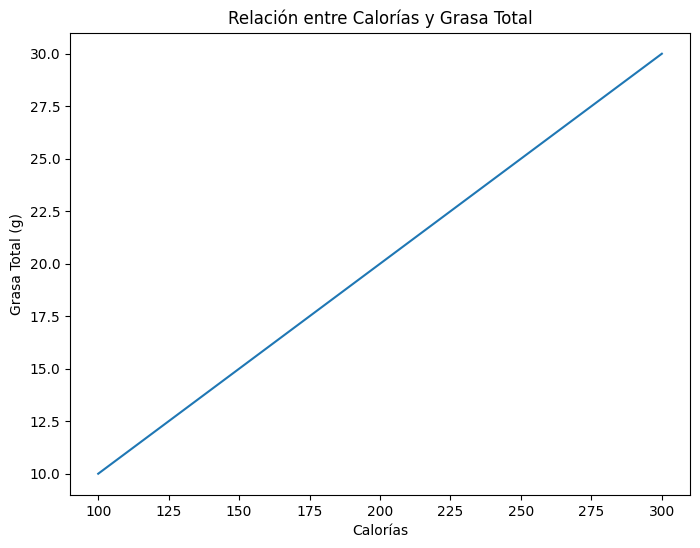

In [15]:
# Gráfico de líneas entre 'Calories' y 'Total Fat (g)'
plt.figure(figsize=(8, 6))
sns.lineplot(x='Calories', y='Total Fat (g)', data=numeric_data)
plt.title("Relación entre Calorías y Grasa Total")
plt.xlabel("Calorías")
plt.ylabel("Grasa Total (g)")
plt.show()

### Grafico promedio de calorias por compañia

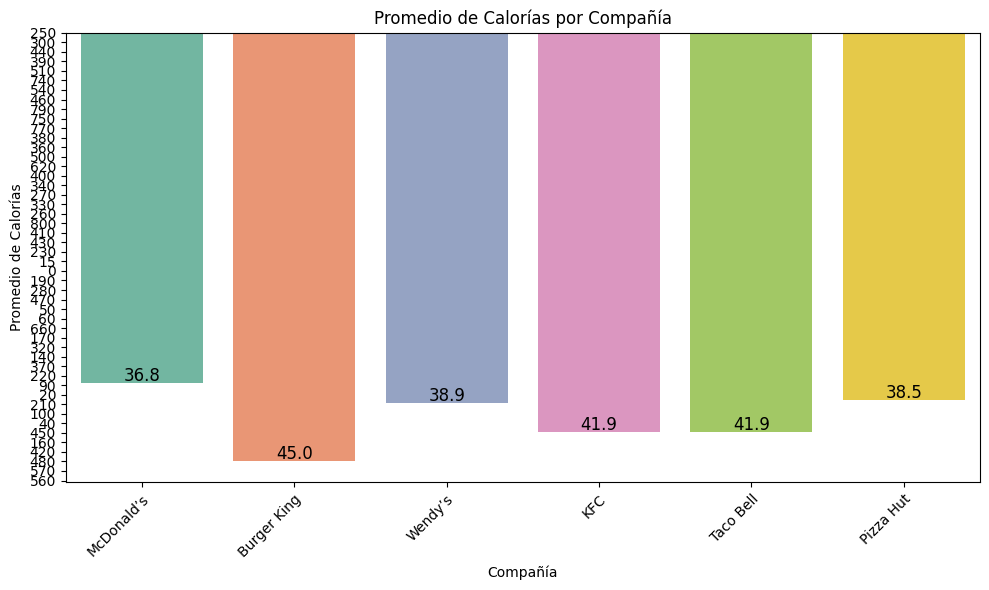

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='Company', y='Calories', errorbar=None, hue='Company', palette='Set2')

# Agregar los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Formatear el número a 1 decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición (X, Y)
                ha='center', va='center',  # Alineación del texto
                fontsize=12, color='black',  # Tamaño y color del texto
                xytext=(0, 5), textcoords='offset points')  # Desplazar ligeramente hacia arriba

plt.title("Promedio de Calorías por Compañía")
plt.xlabel("Compañía")
plt.ylabel("Promedio de Calorías")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()  # Ajustar el gráfico para que no se solapen los elementos
plt.show()


### Coleresterol en productos

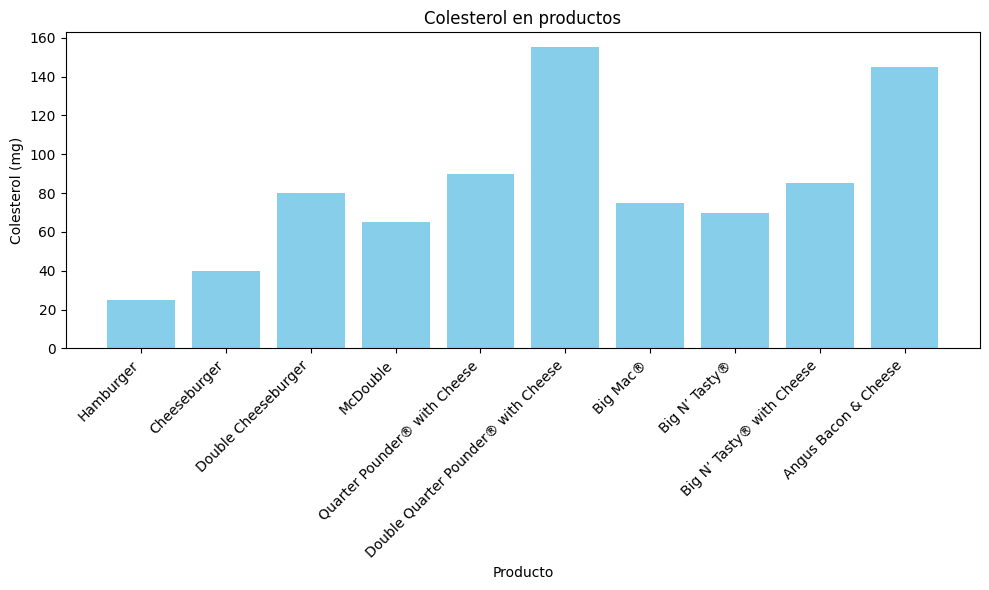

In [17]:
# Limpiar los nombres de las columnas para evitar saltos de línea u otros caracteres
data.columns = data.columns.str.replace('\n', ' ', regex=False)

# Asegurarse de que la columna 'Cholesterol (mg)' sea numérica
data['Cholesterol (mg)'] = pd.to_numeric(data['Cholesterol (mg)'], errors='coerce')

# Eliminar filas con NaN en la columna de colesterol
data = data.dropna(subset=['Cholesterol (mg)'])

# Seleccionar los primeros 10 productos y sus valores de colesterol
top_10_products = data.head(10)

# Crear el gráfico de barras con los primeros 10 productos
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Item'], top_10_products['Cholesterol (mg)'], color='skyblue')

# Etiquetas y título
plt.xlabel('Producto')
plt.ylabel('Colesterol (mg)')
plt.title('Colesterol en productos')

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Productos mas consumidos

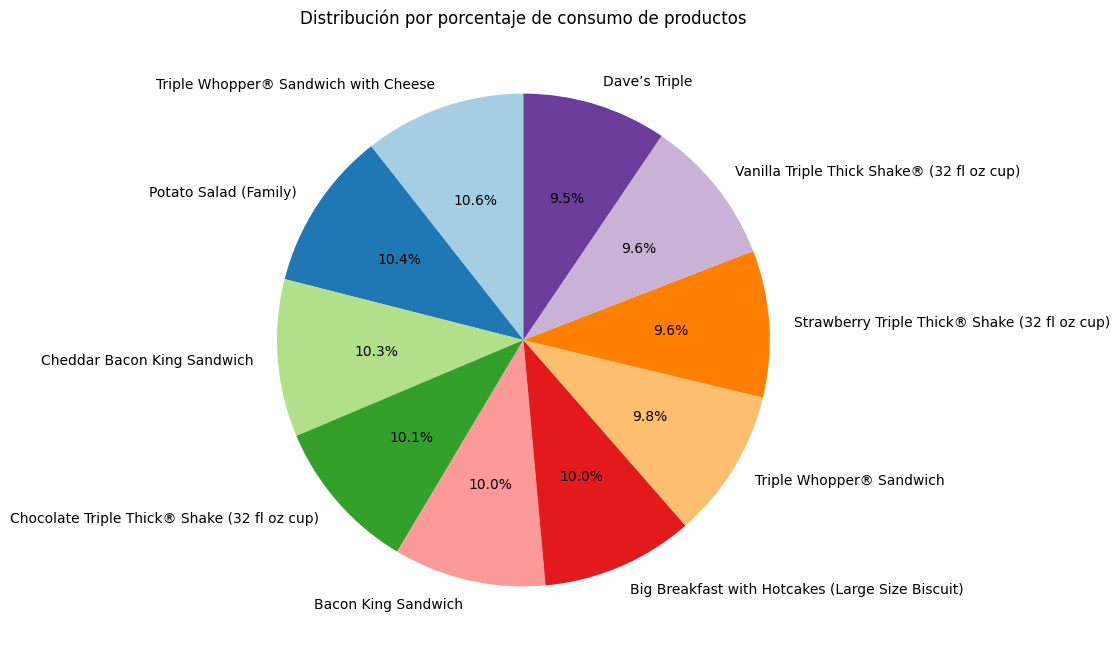

In [73]:
# Limpiar los nombres de las columnas
data.columns = data.columns.str.replace('\n', ' ', regex=False)

# Asegurarse de que las calorías sean numéricas
data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')

# Eliminar filas con NaN en la columna de calorías
data = data.dropna(subset=['Calories'])

# Calcular el total de calorías para el cálculo del porcentaje
total_calories = data['Calories'].sum()

# Calcular el porcentaje de consumo de calorías para cada producto
data['Percentage'] = (data['Calories'] / total_calories) * 100

# Seleccionar los primeros 10 productos más consumidos (en términos de calorías)
top_10_products = data.sort_values(by='Calories', ascending=False).head(10)

# Crear el gráfico circular de distribución de productos por porcentaje
plt.figure(figsize=(8, 8))
plt.pie(top_10_products['Percentage'], labels=top_10_products['Item'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Título
plt.title('Distribución por porcentaje de consumo de productos')

# Mostrar el gráfico
plt.show()
